# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [2]:
# Parametry rozkładu jednostajnego
a, b = -2, 4  # zakładamy, że chcemy losować z przedziału [-2, 4]

# Parametry rozkładu normalnego
mu, sigma = 1, 1

# Liczba próbek
N = 10000

# Losowanie próbki z rozkładu jednostajnego
uniform_data = np.random.uniform(a, b, N)

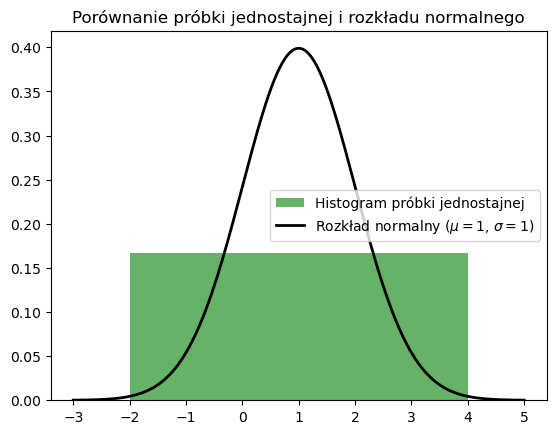

In [3]:
# Punkty, dla których będziemy rysować funkcję gęstości rozkładu normalnego
t = np.linspace(-3, 5, 1000)

# Rysowanie histogramu próbki z rozkładu jednostajnego
plt.hist(uniform_data, bins=1, density=True, alpha=0.6, color='g', label='Histogram próbki jednostajnej')

# Rysowanie funkcji gęstości rozkładu normalnego
plt.plot(t, stats.norm.pdf(t, mu, sigma), 'k-', lw=2, label='Rozkład normalny ($\mu=1$, $\sigma=1$)')

# Dodanie legendy i tytułu
plt.legend()
plt.title('Porównanie próbki jednostajnej i rozkładu normalnego')
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

In [4]:
a,b = -2, 2
n = 1000
rozklad = np.random.uniform(a, b, n)
mu = rozklad.mean()
def get_sigm(rozklad, mu):
    summ = 0
    for i in rozklad:
        summ += (i-mu)**2
    return summ/len(rozklad)
sigm = get_sigm(rozklad, mu)
print(mu, sigm)

0.006072595572139601 1.3208065740985329


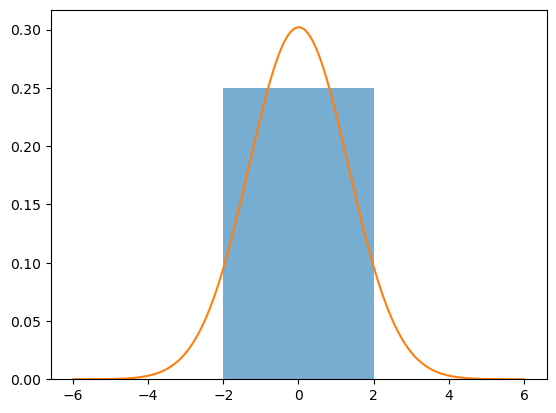

In [5]:
from scipy.stats import norm
plt.hist(rozklad, bins=1, density=True, alpha=0.6, label='Histogram próbki jednostajnej')
x = np.linspace(mu - 6, mu + 6, 1000)
y = norm.pdf(x, mu, sigm)
plt.plot(x, y)

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

In [6]:
import numpy as np
import scipy.stats as st

a, b = -2, 2  # Przykładowe granice rozkładu jednostajnego
N = 1000  # Liczba próbek

# Generowanie próbki z rozkładu jednostajnego
uniform_data = np.random.uniform(a, b, N)

# Użycie funkcji fit() do znalezienia parametrów mu i sigma dla rozkładu normalnego
mu, sigma = st.norm.fit(uniform_data)

print(mu, sigma)

0.015362813497826987 1.144744956575993


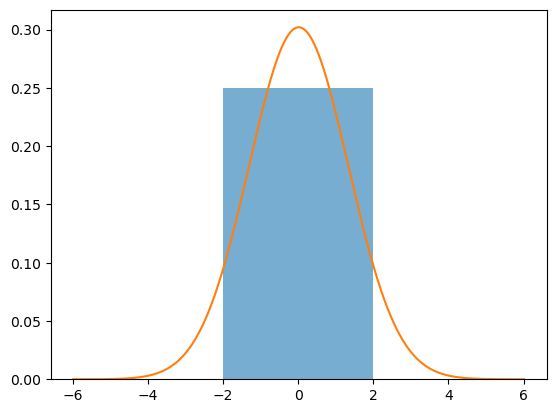

In [7]:
plt.hist(rozklad, bins=1, density=True, alpha=0.6, label='Histogram próbki jednostajnej')
x = np.linspace(mu - 6, mu + 6, 1000)
y = st.norm.pdf(x, mu, sigm)
plt.plot(x, y)

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [8]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [9]:
def loggpdf(x,m,sigma):
    return np.log(1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-m)**2/(2 * sigma**2)))

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [13]:
# def log_likelihood(data, m, sigma):
#     return -sum(loggpdf(x, m, sigma) for x in data)
# a = log_likelihood(uniform_data,0,1)
# b = log_likelihood(uniform_data,0,2)
# c = log_likelihood(uniform_data,1,1)
# d = log_likelihood(uniform_data,0.5,0.2)
# print(a,b,c,d)
def minuslog_likelihood(params, data):
    m, sigma = params
    return -sum(loggpdf(x, m, sigma) for x in data)

# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [11]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [14]:
x0 = [-0.08922162,1.18856567]
res2 = optimize.fmin_cg(minuslog_likelihood, x0, args=(uniform_data,))
print(res2)

         Current function value: 1554.120400
         Iterations: 7
         Function evaluations: 192
         Gradient evaluations: 60
[0.01536274 1.14474497]


C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:1698: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, **opts)
